In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

<h5 style="color: SkyBlue;">Load Dataset</h5>

In [3]:
df = pd.read_csv('user_data_for_disease_prediction - unclassified data set.csv')
print(df.head())

   Heart Rate (bpm)  Breathing Rate (brpm)  Oxygen Saturation (%)  \
0              80.3                   12.2                   96.4   
1              73.1                   17.7                   95.9   
2              72.2                   18.0                   96.0   
3              70.6                   14.7                   95.1   
4              99.5                   19.5                   97.6   

   Blood Pressure (systolic)  Blood Pressure (diastolic)  Stress Index  \
0                      107.3                        74.2          39.6   
1                       92.4                        70.8          98.7   
2                      102.4                        75.6          45.3   
3                      110.0                        62.2          77.8   
4                      110.2                        73.0          57.3   

   Recovery Ability  PNS Index  SNS Index  RMSSD (ms)  SD2 (ms)  \
0                 0       -0.9        0.4        49.7      67.9   
1     

In [4]:
# handle missing values 
df.fillna(0, inplace=True)

<h5 style="color: SkyBlue;">Ranking of diseases in the dataset</h5>

In [5]:
def classify_disease(row):
    gender = row["Gender (0-M;1-F)"]

    # Hypertension
    if (
        row["Blood Pressure (systolic)"] > 130 or row["Blood Pressure (diastolic)"] > 80
    ) and (row["Heart Rate (bpm)"] >= 60 and row["Heart Rate (bpm)"] <= 100):
        return "Hypertension"

    # Atherosclerosis (distinct criteria for this condition)
    elif row["Blood Pressure (systolic)"] > 140 or row["Hemoglobin A1c (%)"] > 7.0:
        return "Atherosclerosis"

    # Cardiovascular Disease (CVD)
    elif (row["Heart Rate (bpm)"] > 100 or row["Heart Rate (bpm)"] < 60) or (
        row["Blood Pressure (systolic)"] > 140 or row["Blood Pressure (diastolic)"] > 90
    ):
        return "Cardiovascular Disease (CVD)"

    # Respiratory Disease (COPD or Asthma)
    elif row["Breathing Rate (brpm)"] > 20 or row["Oxygen Saturation (%)"] < 90:
        return "Respiratory Disease (COPD or Asthma)"

    # Chronic Fatigue Syndrome (CFS)
    elif (
        row["HRV SDNN (ms)"] < 50
        or row["RMSSD (ms)"] < 30
        or row["Recovery Ability"] == 0
    ):
        return "Chronic Fatigue Syndrome (CFS)"

    # Diabetes
    elif row["Hemoglobin A1c (%)"] > 6.5:
        return "Diabetes"

    # Arrhythmias
    elif row["HRV SDNN (ms)"] > 100 or row["Mean RRI (ms)"] < 600:
        return "Arrhythmias"

    # Stress-related Disorders
    elif row["Stress Index"] > 70 or row["SNS Index"] > 1.0:
        return "Stress-related Disorders"

    # Autonomic Dysfunction
    elif row["PNS Index"] < -1.0 or row["SNS Index"] > 1.0:
        return "Autonomic Dysfunction"

    # Anaemia (adjusted for gender)
    elif (gender == 0 and row["Hemoglobin (g/dl)"] < 13.5) or (
        gender == 1 and row["Hemoglobin (g/dl)"] < 12.0
    ):
        return "Anaemia"

    # If none of the conditions are met, classify as Healthy
    else:
        return "Healthy"


# Apply the updated classify_disease function to each row and create a new column for the disease
df["Disease"] = df.apply(classify_disease, axis=1)

# Count occurrences of each disease
disease_counts = df["Disease"].value_counts()

# Sort counts in descending order and display the results
disease_counts_sorted = disease_counts.sort_values(ascending=False)
print(disease_counts_sorted)

Disease
Atherosclerosis                         152809
Hypertension                            115644
Cardiovascular Disease (CVD)             99122
Chronic Fatigue Syndrome (CFS)           53545
Respiratory Disease (COPD or Asthma)     28039
Stress-related Disorders                   352
Arrhythmias                                284
Healthy                                     67
Autonomic Dysfunction                       65
Diabetes                                    48
Anaemia                                     25
Name: count, dtype: int64


<h5 style="color: SkyBlue;">Logistic Regression</h5>

c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\linear_model\_logi

Classification Report:
                                       precision    recall  f1-score   support

                             Anaemia       0.01      1.00      0.02         4
                         Arrhythmias       0.03      0.67      0.05        49
                     Atherosclerosis       0.83      0.70      0.76     30517
               Autonomic Dysfunction       0.01      0.70      0.03        10
        Cardiovascular Disease (CVD)       0.75      0.78      0.77     19732
      Chronic Fatigue Syndrome (CFS)       0.95      0.96      0.95     10732
                            Diabetes       0.00      0.10      0.00        10
                             Healthy       0.03      0.75      0.06        12
                        Hypertension       0.81      0.76      0.78     23277
Respiratory Disease (COPD or Asthma)       0.48      0.55      0.51      5598
            Stress-related Disorders       0.03      0.49      0.05        59

                            accuracy  

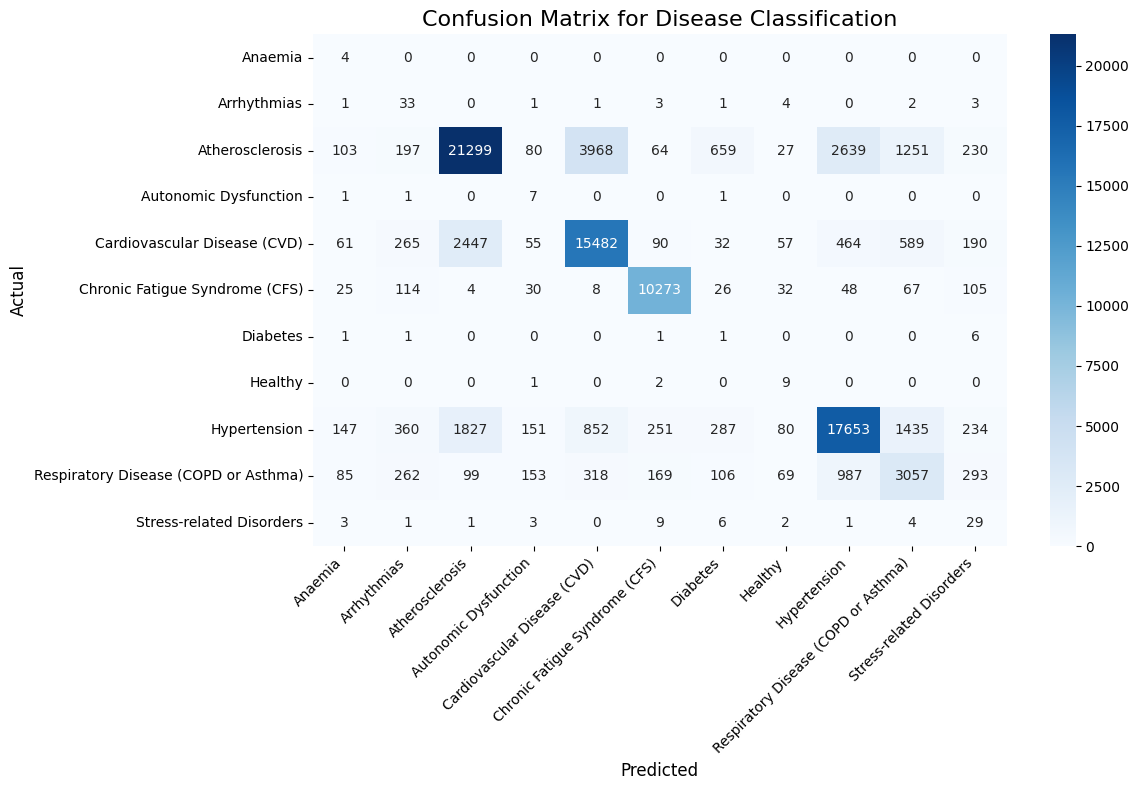

In [6]:
df["Disease"] = df.apply(classify_disease, axis=1)

# Encode the Disease labels as numeric values (for multi-class logistic regression)
label_encoder = LabelEncoder()
df["Disease_Encoded"] = label_encoder.fit_transform(df["Disease"])

X = df.drop(['Disease', 'Disease_Encoded'], axis=1)
y = df["Disease_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='ovr')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Decode predictions back to original disease labels
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder.classes_)

# confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Disease Classification', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h5 style="color: SkyBlue;">Decision Tree</h5>

Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.94      0.97        49
           2       1.00      1.00      1.00     30517
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00     19732
           5       1.00      1.00      1.00     10732
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00     23277
           9       1.00      1.00      1.00      5598
          10       1.00      1.00      1.00        59

    accuracy                           1.00     90000
   macro avg       0.98      0.98      0.98     90000
weighted avg       1.00      1.00      1.00     90000

Decision Tree - Accuracy: 0.9999444444444444


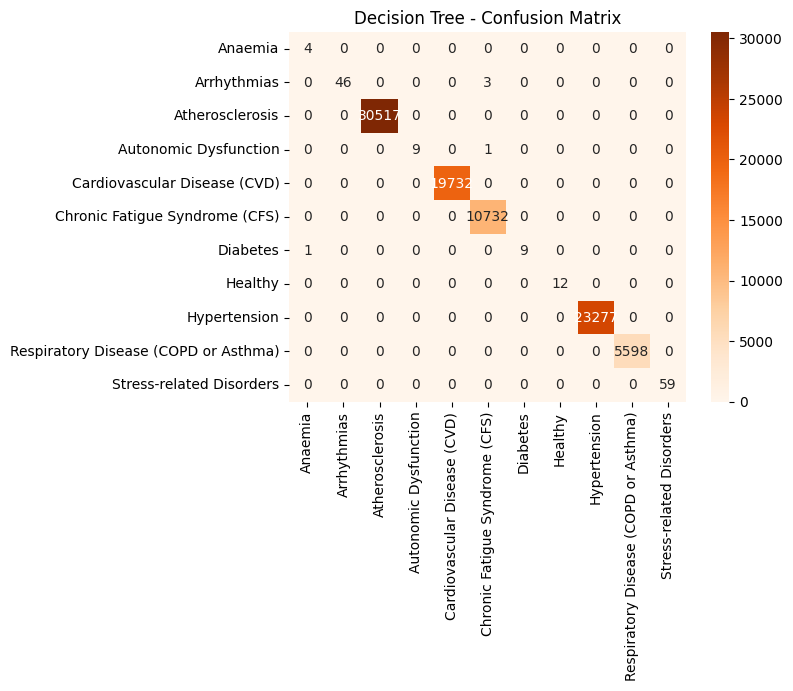

In [7]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree - Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, cmap='Oranges', fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Decision Tree - Confusion Matrix')
plt.show()

<h5 style="color: SkyBlue;">Random Forest</h5>

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.98      0.96      0.97        49
           2       1.00      1.00      1.00     30517
           3       0.89      0.80      0.84        10
           4       1.00      1.00      1.00     19732
           5       1.00      1.00      1.00     10732
           6       1.00      0.30      0.46        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00     23277
           9       1.00      1.00      1.00      5598
          10       0.92      1.00      0.96        59

    accuracy                           1.00     90000
   macro avg       0.95      0.87      0.89     90000
weighted avg       1.00      1.00      1.00     90000

Random Forest - Accuracy: 0.9998555555555556


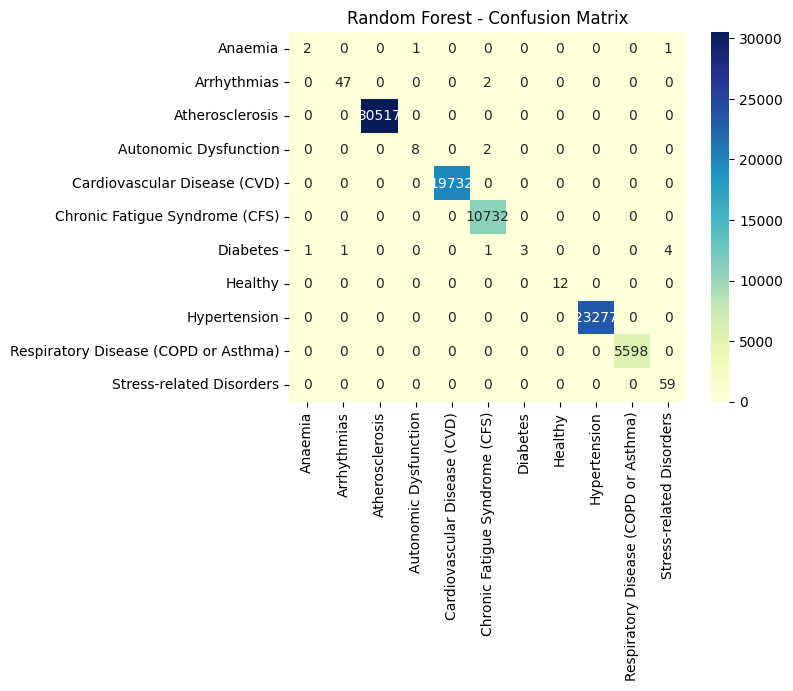

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, cmap='YlGnBu', fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest - Confusion Matrix')
plt.show()

<h5 style="color: SkyBlue;">GBM</h5>

Gradient Boosting Model - Classification Report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00     30517
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00     19732
           5       1.00      1.00      1.00     10732
           6       1.00      0.70      0.82        10
           7       0.92      0.92      0.92        12
           8       1.00      1.00      1.00     23277
           9       1.00      1.00      1.00      5598
          10       0.97      1.00      0.98        59

    accuracy                           1.00     90000
   macro avg       0.96      0.91      0.93     90000
weighted avg       1.00      1.00      1.00     90000

Gradient Boosting Model - Accuracy: 0.9997666666666667


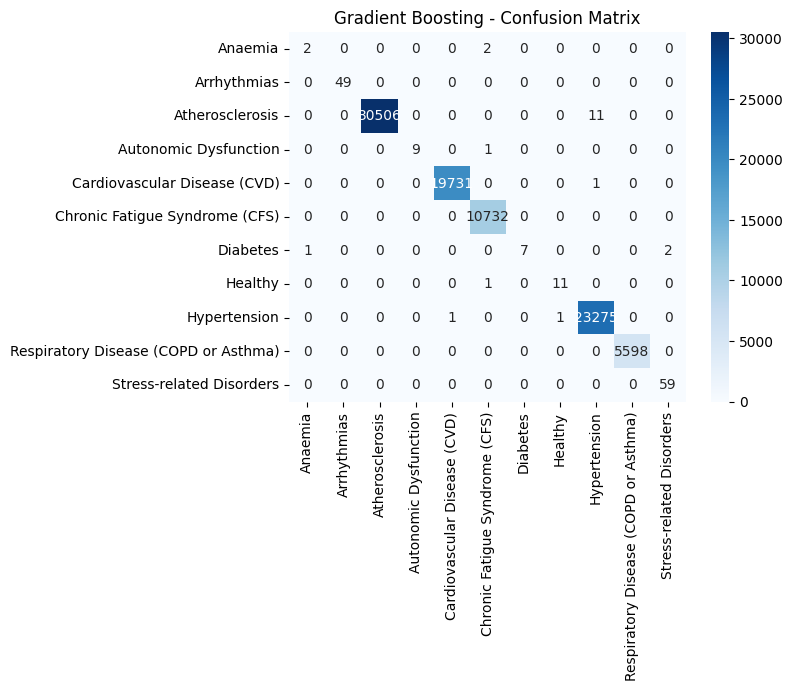

In [9]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)

print("Gradient Boosting Model - Classification Report")
print(classification_report(y_test, y_pred_gbm))

print("Gradient Boosting Model - Accuracy:", accuracy_score(y_test, y_pred_gbm))

# confusion Matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(conf_matrix_gbm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Gradient Boosting - Confusion Matrix')
plt.show()

<h5 style="color: SkyBlue;">KNN</h5>

K-Nearest Neighbors Model - Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.12      0.04      0.06        49
           2       0.65      0.68      0.66     30517
           3       0.00      0.00      0.00        10
           4       0.60      0.62      0.61     19732
           5       0.90      0.95      0.92     10732
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        12
           8       0.89      0.87      0.88     23277
           9       0.58      0.42      0.49      5598
          10       0.00      0.00      0.00        59

    accuracy                           0.73     90000
   macro avg       0.34      0.32      0.33     90000
weighted avg       0.73      0.73      0.73     90000

K-Nearest Neighbors Model - Accuracy: 0.7290444444444445


c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

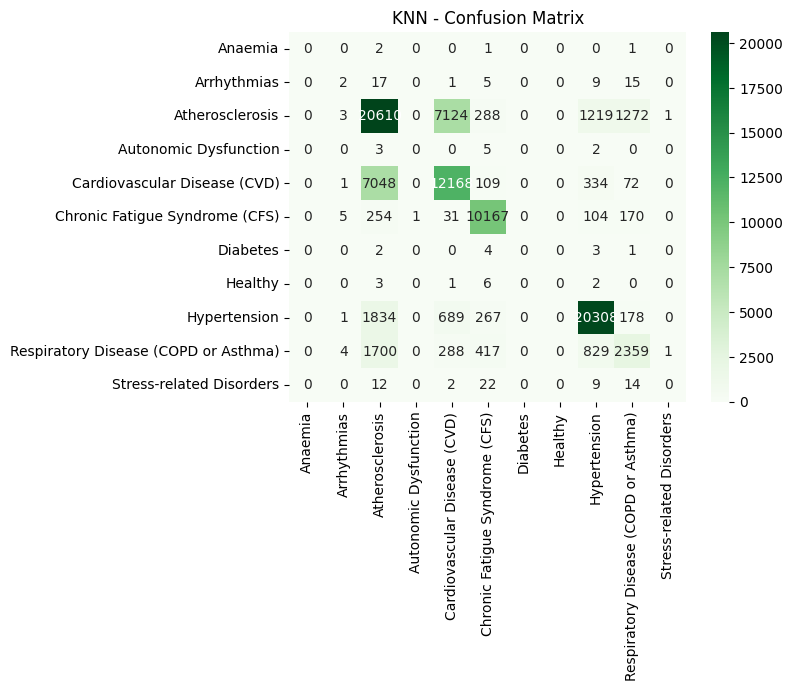

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Model - Classification Report")
print(classification_report(y_test, y_pred_knn))

print("K-Nearest Neighbors Model - Accuracy:", accuracy_score(y_test, y_pred_knn))

# confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, cmap='Greens', fmt='d', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN - Confusion Matrix')
plt.show()

<h5 style="color: SkyBlue;">LightGBM</h5>

LightGBM - Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      1.00      0.00        49
           2       0.00      0.00      0.00     30517
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00     19732
           5       0.00      0.00      0.00     10732
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00     23277
           9       0.00      0.00      0.00      5598
          10       0.00      0.00      0.00        59

    accuracy                           0.00     90000
   macro avg       0.00      0.09      0.00     90000
weighted avg       0.00      0.00      0.00     90000

LightGBM - Accuracy: 0.0005444444444444444


c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

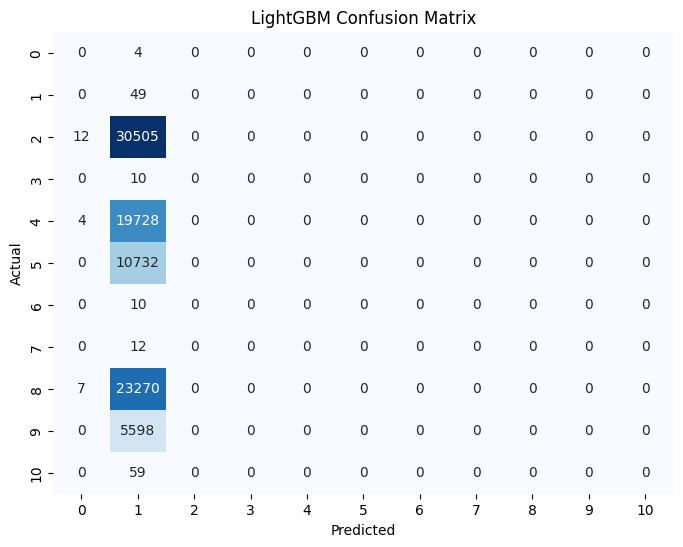

In [11]:
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'verbosity': -1
}
lgb_model = lgb.train(params, train_data, num_boost_round=100)

y_pred_lgb = (lgb_model.predict(X_test) >= 0.5).astype(int)

print("LightGBM - Classification Report")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM - Accuracy:", accuracy_score(y_test, y_pred_lgb))

# confusion  matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h5 style="color: SkyBlue;">XGBoost</h5>

c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model - Classification Report
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.98      0.99        49
           2       1.00      1.00      1.00     30517
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00     19732
           5       1.00      1.00      1.00     10732
           6       1.00      0.90      0.95        10
           7       1.00      0.83      0.91        12
           8       1.00      1.00      1.00     23277
           9       1.00      1.00      1.00      5598
          10       0.97      1.00      0.98        59

    accuracy                           1.00     90000
   macro avg       0.97      0.95      0.96     90000
weighted avg       1.00      1.00      1.00     90000

XGBoost Model - Accuracy: 0.9993333333333333


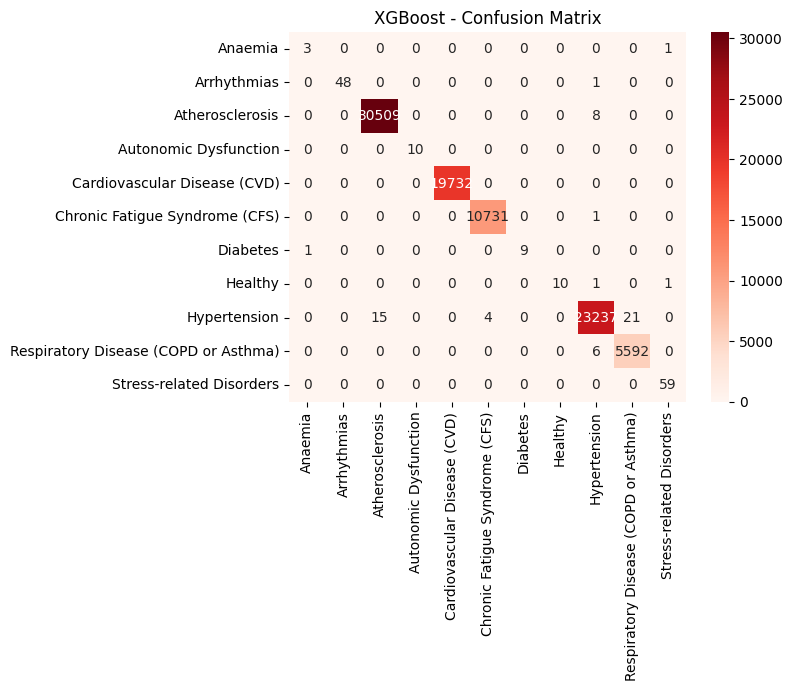

In [12]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Model - Classification Report")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost Model - Accuracy:", accuracy_score(y_test, y_pred_xgb))

# confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Reds', fmt='d', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('XGBoost - Confusion Matrix')
plt.show()

<h5 style="color: SkyBlue;">ExtraTreesClassifier</h5>

ExtraTrees - Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.02      0.04        49
           2       0.99      1.00      0.99     30517
           3       0.00      0.00      0.00        10
           4       0.99      0.99      0.99     19732
           5       1.00      0.97      0.99     10732
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        12
           8       0.98      0.99      0.99     23277
           9       0.96      0.95      0.95      5598
          10       1.00      0.05      0.10        59

    accuracy                           0.99     90000
   macro avg       0.63      0.45      0.46     90000
weighted avg       0.99      0.99      0.99     90000

ExtraTrees - Accuracy: 0.9863444444444445


c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zen\Documents\les trucs du boulot\TM R&D\E-Health\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

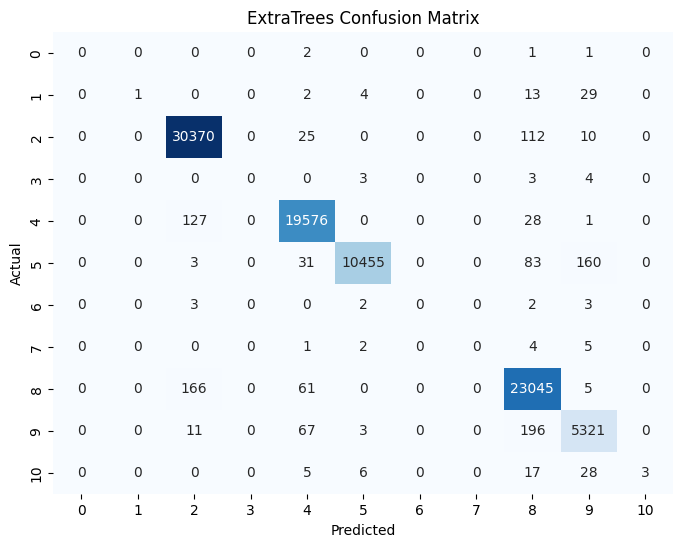

In [13]:
X = X.astype('float32')

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=1)
et_model.fit(X_train, y_train)

y_pred_et = et_model.predict(X_test)

print("ExtraTrees - Classification Report")
print(classification_report(y_test, y_pred_et))
print("ExtraTrees - Accuracy:", accuracy_score(y_test, y_pred_et))

conf_matrix_et = confusion_matrix(y_test, y_pred_et)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("ExtraTrees Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()